# Diagrama de fases para misturas binárias ideais

# Apresentação

Esse notebook ensina como usar a lei de Raoult e as equações de Antoine para calcular os diagramas
- Pxy
- Txy
- xy
para misturas binárias. 

# Introdução

Para misturas binárias, a lei de Raoul provê uma relação de equilíbrio muito útil entre pressão, temperatura e composição das fases líquida e vapor. Essa relação pode ser expressar por um conjunto de equações ou graficamente como:

* **Diagrama Pxy** que relaciona a pressão com as composições do líquido e do vapor a uma temperatura fixa.
* **Diagrama Txy** que relaciona a temperatura com as composições do líquido e do vapor a uma pressão fixa. 
* **Diagrama xy** que relaciona as composições do líquido e do vapor geralmente plotado a uma pressão fixa. 

O seguinte [vídeo](https://www.youtube.com/watch?v=E_Vuz8cfbEo&feature=youtu.be) do [LearnChemE](http://www.learncheme.com/) fornece uma breve introdução do presente tema.

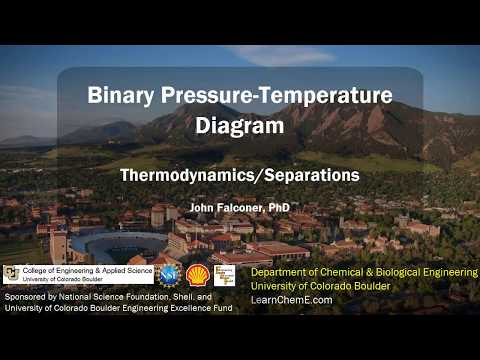

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('E_Vuz8cfbEo') 

# Equação de Antoine

Os cálculos do presente notebook utilizam a equação de Antoine para computar a pressão de saturação dada uma temperatura e resolve a equação de Antoine para uma certa temperatura dada uma pressão. 



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ft = 14
plt.rcParams.update({'font.size':ft})

In [3]:
class Species(object):
  
  def __init__(self, name='no name',antoine = pd.read_csv('https://raw.githubusercontent.com/amandalemette/images/main/ENG1818/Antoine.csv')):
    self.name = name
    self.antoine = antoine
  
  def antoine():
    return pd.read_csv('Antoine.csv')

  def params(self):
    idx = self.antoine[self.antoine['compoundname']== self.name].index[0]
    A = self.antoine.loc[idx]['A']
    B = self.antoine.loc[idx]['B']
    C = self.antoine.loc[idx]['C']
    Tmin = self.antoine.loc[idx]['Tmin']
    Tmax = self.antoine.loc[idx]['Tmax']
    return [A,B,C,Tmin,Tmax]

  def Psat(self,params,T):
    return 10**(params[0]-params[1]/(T+params[2]))

  def Tsat(self,params,P):
    return params[1]/(params[0]-np.log10(P))-params[2]

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/amandalemette/images/main/ENG1818/Antoine.csv')
df.head(2)

,ID,formula,compoundname,A,B,C,Tmin,Tmax
0,1,CCL4,carbon-tetrachloride,6.8941,1219.58,227.17,-20,101.0
1,2,CCL3F,trichlorofluoromethane,6.8843,1043.01,236.86,-33,27.0


In [53]:
tol = Species('toluene')

In [55]:
tol.params()

[6.95464, 1344.8, 219.482, 6, 136.0]

In [19]:
df[df['compoundname']=='toluene']

,ID,formula,compoundname,A,B,C,Tmin,Tmax
292,293,C7H8,toluene,6.95464,1344.8,219.482,6,136.0


In [20]:
df[df['compoundname']=='acetone']

,ID,formula,compoundname,A,B,C,Tmin,Tmax
106,107,C3H6O,acetone,7.2316,1277.03,237.23,-32,77.0


In [25]:
df[df['formula']=='C2H6O'] # ethanol

,ID,formula,compoundname,A,B,C,Tmin,Tmax
79,80,C2H6O,methyl-ether,7.3164,1025.56,256.06,-94,-8.0
80,81,C2H6O,ethyl-alcohol,8.2133,1652.05,231.48,-3,96.0


In [56]:
P = 760 # mmHg

In [71]:
ac = Species('acetone')
print(ac.params())
Tsat = ac.Tsat(ac.params(),P)
print(f'PE da acetona em condições normais (Pressão = 760 mmHg): {np.round(Tsat,2)} C')

[7.2316, 1277.03, 237.23, -32, 77.0]
PE da acetona em condições normais (Pressão = 760 mmHg): 56.29 C


In [72]:
et = Species('ethyl-alcohol')
print(et.params())
Tsat = et.Tsat(et.params(),P)
print(f'PE do etanol em condições normais (Pressão = 760 mmHg): {np.round(Tsat,2)} C')

[8.2133, 1652.05, 231.48, -3, 96.0]
PE do etanol em condições normais (Pressão = 760 mmHg): 78.33 C


Calcule o ponto de ebulição do tolueno também a pressão de 760 mmHg.

# Misturas Binárias

Para uma **mistura binária** ideal dos componentes $A$ e $B$, a pressão da fase vapor $P$ é a soma das pressões parciais $p_A$ e $p_B$

\begin{equation}
P = p_A + p_B
\end{equation}

A lei de Raoult, por sua vez, diz que para misturas ideais

\begin{align*}
p_A & = x_A P^{sat}_A(T) \\
p_B & = x_B P^{sat}_B(T)
\end{align*}

Substituindo os termos das pressões parciais, temos:

\begin{equation}
P = \underbrace{x_A P_A^{sat}(T)}_{p_A = y_AP} + \underbrace{x_B P_A^{sat}(T)}_{p_B = y_BP}
\end{equation}

Para misturas binárias, as substituições $x_B = 1-x_A$ e $y_B = 1 - y_A$ provê uma expressão para a pressão total como função da composição $x_A$ e da temperatura.

\begin{equation}
P = \underbrace{x_A P_A^{sat}(T)}_{p_A = y_AP}+ \underbrace{(1-x_A) P_A^{sat}(T)}_{p_B=(1-y_B)P}
\end{equation}

O próximo passo é selecionar a temperatura $T$ e rodar a expressão anterior. Essa simulação vai mostrar os valores de $P$, $p_A$ e $p_B$ da fração molar $x_A$ na fase líquida.

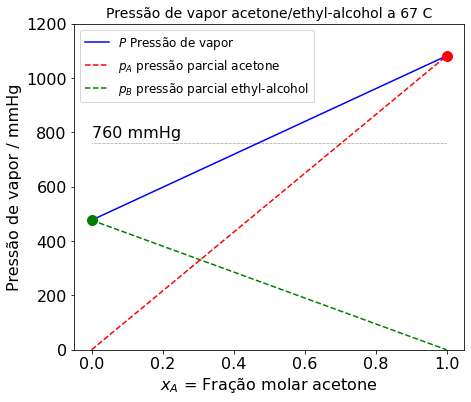

In [84]:
#@title Lei de Raoult { run: "auto", vertical-output: true, form-width: "500px" }
#@markdown Defina aqui a temperatura do líquido.
T = 67 #@param {type:"slider", min:30, max:80, step:0.2}

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv,'b')
plt.plot(xA, pA,'r--')
plt.plot(xA, pB,'g--')

# mark pure component saturation pressures
plt.plot(0, et.Psat(et.params(),T), 'g.', ms=20)
plt.plot(1, ac.Psat(ac.params(),T), 'r.', ms=20)

# annotate the plot
plt.plot([0,1],[760,760],'k:', lw=0.5)
plt.text(0, 780, '760 mmHg')
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Fração molar ' + ac.name)
plt.ylabel('Pressão de vapor / mmHg')
#plt.title('Pressão de vapor '+ac.name+' / '+et.name+
#          ' a {:.1f} deg C'.format(T))
plt.title(f'Pressão de vapor {ac.name}/{et.name} a {np.round(T,2)} C',fontsize = 14)
plt.legend(['$P$ Pressão de vapor',
            '$p_A$ pressão parcial ' + ac.name,
            '$p_B$ pressão parcial ' + et.name],fontsize = 12)
plt.show()

As linhas pontilhadas denotam as pressões parciais de $A$ e $B$. Essa informação pode ser usada para computar a composição na fase vapor. 

\begin{align*}
y_A & = \frac{p_A}{p_A + p_B} = \frac{p_A}{P} \\
\end{align*}

Essa informação pode ser adicionada ao plot computando  $y_A$ e plotando os pares de coordenadas $(y_A, P)$.

Para ler o diagrama, comece com o valor da composição da fase líquida, olhe acima para achar a pressão de vapor, depois olhe para a direita para achar a composição do vapor em equilíbrio com a fase líquida. 


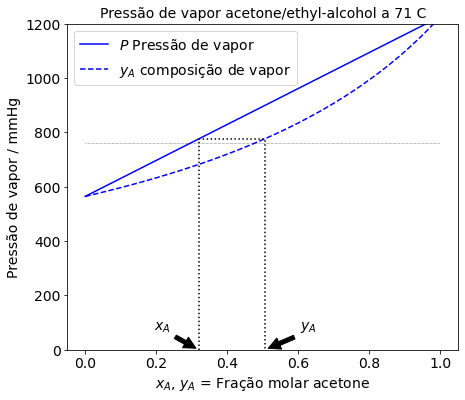

In [93]:
#@title Composição da fase vapor { run: "auto", vertical-output: true }
T = 71 #@param {type:"slider", min:30, max:80, step:1}
xA = 0.32 #@param {type:"slider", min:0, max:1, step:0.01}
show_partial_pressures = True #@param {type:"boolean"}
show_tie_line = True #@param {type:"boolean"}

xA_save = xA

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*ac.Psat(ac.params(),T)
pB = (1-xA)*et.Psat(et.params(),T)
Pv = pA + pB
yA = pA/Pv

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv, 'b')
plt.plot(yA, Pv, 'b--')
   
# annotate the plot
plt.plot([0,1], [760,760], 'k:', lw=0.5)
plt.ylim(0, 1200)
plt.xlabel('$x_A$, $y_A$ = Fração molar ' + ac.name)
plt.ylabel('Pressão de vapor / mmHg')
plt.title(f'Pressão de vapor {ac.name}/{et.name} a {np.round(T,2)} C',fontsize = 14)
plt.legend(['$P$ Pressão de vapor',
            '$y_A$ composição de vapor'])

if show_partial_pressures:
    plt.plot(xA, pA, 'r--')
    plt.plot(xA, pB, 'g--')

# show how to use
if show_tie_line:
    xA = xA_save
    pA = xA*ac.Psat(ac.params(),T)     # partial pressure A
    pB = (1-xA)*et.Psat(et.params(),T) # partial pressure B
    Pv = pA + pB          # vapor pressure
    yA = pA/Pv            # vapor phase composition            )
    plt.plot([xA, xA, yA, yA], [0, Pv, Pv, 0], 'k:')
    dx = -40 if xA < yA else 50
    plt.annotate('$x_A$', xy=(xA,0), xycoords='data',
             xytext=(dx-5,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))
    plt.annotate('$y_A$', xy=(yA,0), xycoords='data',
             xytext=(-dx-5,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

# Diagramas Pxy and Txy para misturas binárias

Para uma **mistura binária** de $A$ e $B$, a lei de Raoult diz

\begin{equation}
P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)
\end{equation}

Substituindo $x_B = 1-x_A$

\begin{equation}
P = x_A P_A^{sat}(T) +  (1-x_A) P_A^{sat}(T)
\end{equation}

Resolvendo para $x_A$

\begin{equation}
x_A = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}
\end{equation}

Essa equação provê um método alternativo para criar os diagramas vistos acima. Fixando a temperatura $T$, a equação acima é uma função linear de $P$ que passa pelos pontos $(x_A,P) = (0, P^{sat}_B(T))$ e $(x_A,P) =(1, P^{sat}_A(T))$.

Pela lei de Raoult, nós sabemos que

\begin{equation}
 y_A P  = x_A P_A^{sat}(T) \implies y_A  = x_A \frac{ P_A^{sat}(T)}{P}
\end{equation}

Colocando tudo junto 

\begin{align*}
x_A & = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}\\
y_A & = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}\frac{P_A^{sat}(T)}{P}
\end{align*}

O que resulta nas composições das fases líquida e vapor, $x_A$ and $y_A$ respectivamente, em termos de pressão e temperatura. Esse conhecimento é muito útil na ánalise de processos de separação. A partir dessas equações, conseguimos construir três plots:

* **Pxy** com $T$ fixa. Plote $x_A$ e $y_A$ como funções de $P$ no range $P^{sat}_B(T)$ até $P^{sat}_A(T)$.
* **Txy** com $P$ fixa. Plote $x_A$ e $y_A$ como funções de $T$ no range $T^{sat}_B(P)$ até $T^{sat}_A(P)$.
* **xy** com $T$ ou $P$ fixas. Plote $y_A$ como função de $x_A$ para $T$ no range $T^{sat}_B(P)$ até $T^{sat}_A(P)$ ou para $P$ no range $P^{sat}_B(T)$ até $P^{sat}_A(T)$.

Vamos ver cada um desses plots.

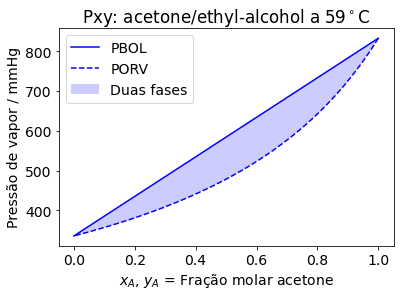

In [9]:
#@title Diagrama Pxy  { run: "auto", vertical-output: true }
T = 59 #@param {type:"slider", min:30, max:80, step:1}

def Pxy(ac, et, T=0): # , z=0, P=760):
    Pp = np.linspace(ac.Psat(ac.params(),T), et.Psat(et.params(),T))
    xA = (Pp - et.Psat(et.params(),T))/(ac.Psat(ac.params(),T) - et.Psat(et.params(),T))
    yA = xA*ac.Psat(ac.params(),T)/Pp
    plt.plot(xA, Pp, 'b')
    plt.plot(yA, Pp, 'b--')
    plt.gca().fill_betweenx(Pp, xA, yA, facecolor='blue', alpha=0.2)
    plt.xlabel('$x_A$, $y_A$ = Fração molar ' + ac.name)
    plt.ylabel('Pressão de vapor / mmHg')
    plt.title(f'Pxy: {ac.name}/{et.name} a {T}$^\circ$C')
    plt.legend(['PBOL', 'PORV', 'Duas fases'])

ac = Species('acetone')
et = Species('ethyl-alcohol')   
Pxy(ac,et,T)

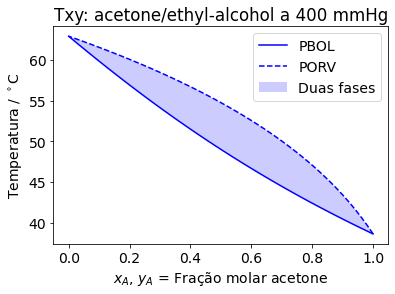

In [10]:
#@title Diagrama Txy { run: "auto", vertical-output: true }
P = 400 #@param {type:"slider", min:200, max:1200, step:10}

def Txy(ac, et, P=760):  #, z=0, T=0):
    Tp = np.linspace(ac.Tsat(ac.params(),P), et.Tsat(et.params(),P))
    xA = (P - et.Psat(et.params(),Tp))/(ac.Psat(ac.params(),Tp) - et.Psat(et.params(),Tp))
    yA = xA*ac.Psat(ac.params(),Tp)/P
    plt.plot(xA, Tp, 'b')
    plt.plot(yA, Tp, 'b--')
    plt.gca().fill_betweenx(Tp, xA, yA, facecolor='blue', alpha=0.2)
    plt.xlabel('$x_A$, $y_A$ = Fração molar ' + ac.name)
    plt.ylabel('Temperatura / $^\circ$C')
    plt.title(f'Txy: {ac.name}/{et.name} a {P} mmHg')
    plt.legend(['PBOL', 'PORV', 'Duas fases'])
    
Txy(ac, et, P)

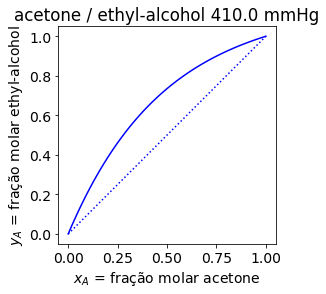

In [11]:
#@title Diagrama xy para uma dada pressão { run: "auto", vertical-output: true }
P = 410 #@param {type:"slider", min:200, max:1200, step:10}

def xy(ac, et, P=None, T=None):  #, z=0, T=0):
  title = ac.name + ' / ' + et.name
  if P is not None:
    T = np.linspace(ac.Tsat(ac.params(),P),et.Tsat(et.params(),P))
    title = title + ' {:.1f} mmHg'.format(P)
  elif T is not None:
    P = np.linspace(ac.Psat(ac.params(),T), et.Psat(et.params(),T))
    title = title + ' {:.1f} deg C'.format(T)
  xA = (P - et.Psat(et.params(),T))/(ac.Psat(ac.params(),T) - et.Psat(et.params(),T))
  yA = xA*ac.Psat(ac.params(),T)/P
  plt.plot(xA, yA, 'b')
  plt.plot([0,1],[0,1],'b:')
  plt.gca().set_aspect('equal','box')
  plt.xlabel('$x_A$ = fração molar ' + ac.name)
  plt.ylabel('$y_A$ = fração molar ' + et.name)
  plt.title(title)
  
xy(ac, et, P=P)

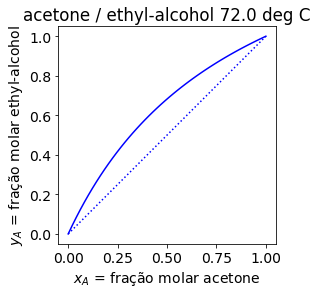

In [12]:
#@title Diagrama xy para uma dada temperatura { run: "auto", vertical-output: true }
T = 72 #@param {type:"slider", min:20, max:80, step:1}

  
xy(ac, et, T=T)

### Exercícios:

1. Por que as duas curvas foram nomeadas como ponto de bolha e ponto de orvalho? 

2. Por que a região entre as curvas PBOL e PORV é chamada de duas fases? 

3. Onde estão localizadas as fases líquida e vapor no diagrama Pxy? E no diagrama Txy? 


# Flash

Imagine que você tenha uma mistura binária líquida com composição de 50 mol% de A, onde A é a espécie mais volátil. Você aquece a mistura em um aparato fechado capaz de manter a pressão constante. 

1. Você gradualmente aquece a mistura até a primeira bolha se formar. Onde esse ponto fica localizado no diagrama Txy? Qual é a composição dessa bolha? Qual é a composição total no vaso fechado?  

2. Você continua a aquecer a mistura até que a metade dela esteja na fase vapor. Temos agora metade dos moles na fase líquida e metade na fase vapor. Qual é a composição do líquido e do vapor agora?  Qual é a composição total? 

3. Você continua a aquecer até que haja uma última gota de líquido. Quais são as composições agora? 


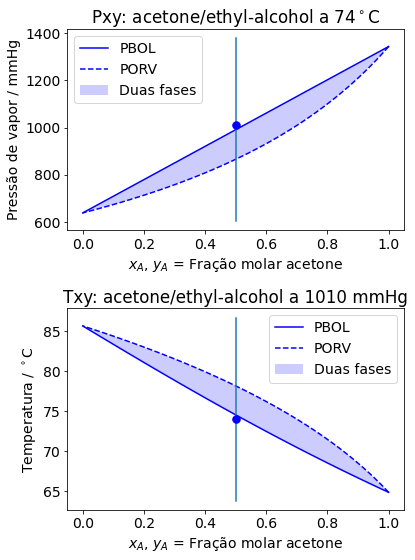

In [27]:
#@title PT Flash { run: "auto", vertical-output: true }
P = 1010 #@param {type:"slider", min:200, max:1200, step:10}
T = 74 #@param {type:"slider", min:30, max:140, step:1}
z = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}

def PTflash(A, B, P, T, z):
    xA = (P - B.Psat(B.params(),T))/(A.Psat(A.params(),T) - B.Psat(B.params(),T))
    yA = xA*A.Psat(A.params(),T)/P
    
    plt.figure(figsize=(6,8))
    plt.subplot(2,1,1)
    Pxy(A, B, T)
    plt.plot([z ,z], plt.ylim())
    if xA < z < yA:
        plt.plot([xA, yA], [P, P], 'b-', marker='.', ms=15)
    else:
        plt.plot(z, P, 'b.', ms=15)
        
    plt.subplot(2,1,2)
    Txy(A, B, P)
    plt.plot([z ,z], plt.ylim())
    if xA < z < yA:
        plt.plot([xA, yA], [T, T], 'b-', marker='.', ms=15)
    else:
        plt.plot(z, T, 'b.', ms=15)
    plt.tight_layout()

A = Species('acetone')
B = Species('ethyl-alcohol')    
PTflash(A, B, P, T, z)